# Нечеткая логика

Разрабатываем систему принятия решений о выдаче ипотеки

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

## Диапазоны набора нечетких входных данных

In [ ]:
x_house_market = np.arange(0, 1000, 1) # Рыночная стоимость x10^3 р.
x_house_location = np.arange(0, 10, .01) # Район
x_person_asset = np.arange(0,1000, 1) # Личные активы $ x10^3 р.
x_person_income = np.arange(0,100, .1) # Доход $ x10^3 р.
x_interest = np.arange(0, 10, .01) # Процентная ставка %

## Определение наборов нечетких входных данных

In [ ]:
# наборы рыночной стоимости дома
market_low = fuzz.trapmf(x_house_market, [0, 0, 50, 100])
market_medium = fuzz.trapmf(x_house_market, [50, 100, 200, 250])
market_high = fuzz.trapmf(x_house_market, [200, 300, 650, 850])
market_very_high = fuzz.trapmf(x_house_market, [650, 850, 1000, 1000])

# наборы районов
location_bad = fuzz.trapmf(x_house_location, [0, 0, 1.5, 4])
location_fair = fuzz.trapmf(x_house_location, [2.5, 5, 6, 8.5])
location_excellent = fuzz.trapmf(x_house_location, [6, 8.5, 10, 10])

# наборы личных активов
p_asset_low = fuzz.trimf(x_person_asset, [0, 0, 150])
p_asset_medium = fuzz.trapmf(x_person_asset, [50, 250, 500, 650])
p_asset_high = fuzz.trapmf(x_person_asset, [500, 700, 1000, 1000])

# наборы доходов человека
p_income_low = fuzz.trapmf(x_person_income, [0, 0, 10, 25])
p_income_medium = fuzz.trimf(x_person_income, [15, 35, 55])
p_income_high = fuzz.trimf(x_person_income, [40, 60, 80])
p_income_very_high = fuzz.trapmf(x_person_income, [60, 80, 100, 100])


# процентные наборы
b_interest_low = fuzz.trapmf(x_interest, [0, 0, 2, 5])
b_interest_medium = fuzz.trapmf(x_interest, [2, 4, 6, 8])
b_interest_high = fuzz.trapmf(x_interest, [6, 8.5, 10, 10])

## Отображение определенных нечетких входных данных

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses 

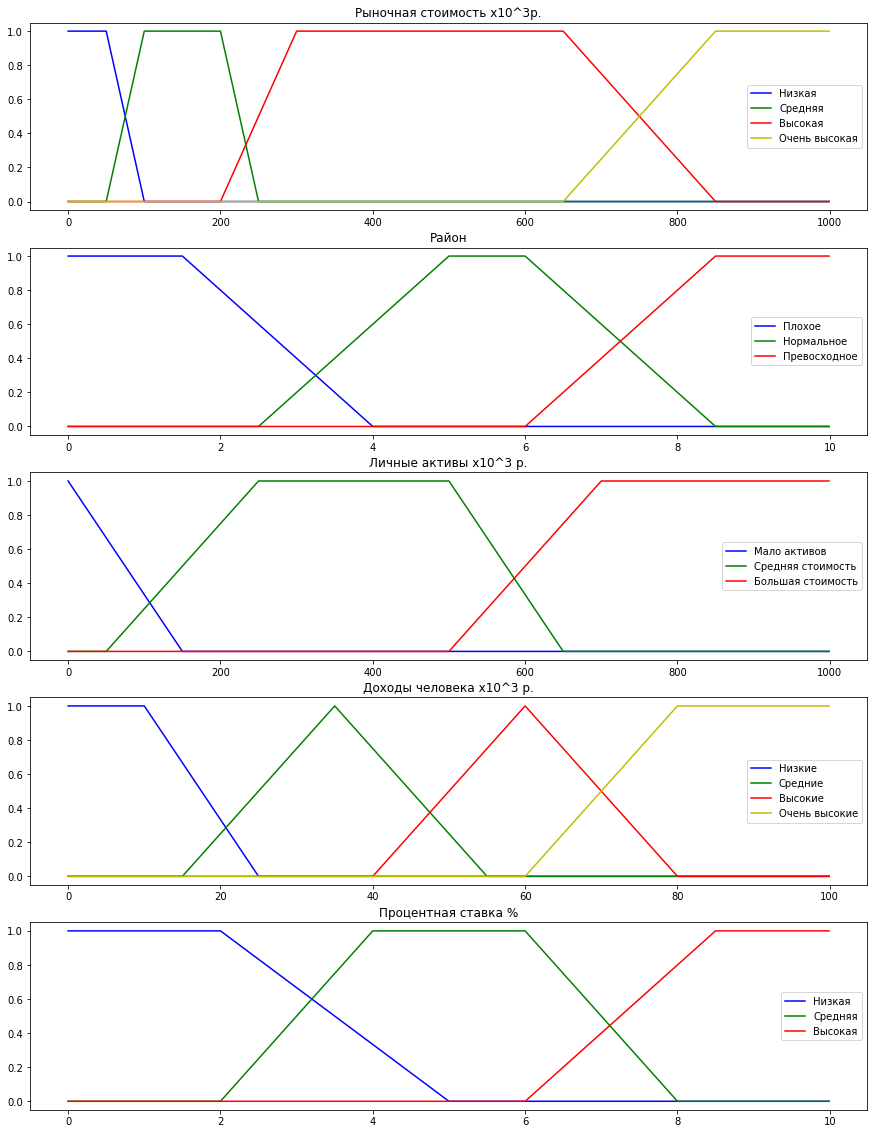

In [ ]:
plt.rcParams["figure.figsize"] = 15, 20
# Рыночная стоимость дома
plt.subplot(5,1,1), plt.plot(x_house_market, market_low, 'b', linewidth=1.5, label='Низкая')
plt.subplot(5,1,1), plt.plot(x_house_market, market_medium, 'g', linewidth=1.5, label='Средняя')
plt.subplot(5,1,1), plt.plot(x_house_market, market_high, 'r', linewidth=1.5, label='Высокая')
plt.subplot(5,1,1), plt.plot(x_house_market, market_very_high, 'y', linewidth=1.5, label='Очень высокая'),plt.title("Рыночная стоимость x10^3р.")
plt.legend()

# Район
plt.subplot(5,1,2), plt.plot(x_house_location, location_bad, 'b', linewidth=1.5, label='Плохое')
plt.subplot(5,1,2), plt.plot(x_house_location, location_fair, 'g', linewidth=1.5, label='Нормальное')
plt.subplot(5,1,2), plt.plot(x_house_location, location_excellent, 'r', linewidth=1.5, label='Превосходное'),plt.title("Район")
plt.legend()

# Личные активы
plt.subplot(5,1,3), plt.plot(x_person_asset, p_asset_low, 'b', linewidth=1.5, label='Мало активов')
plt.subplot(5,1,3), plt.plot(x_person_asset, p_asset_medium, 'g', linewidth=1.5, label='Средняя стоимость')
plt.subplot(5,1,3), plt.plot(x_person_asset, p_asset_high, 'r', linewidth=1.5, label='Большая стоимость'),plt.title("Личные активы x10^3 р.")
plt.legend()

# Доходы человека
plt.subplot(5,1,4), plt.plot(x_person_income, p_income_low, 'b', linewidth=1.5, label='Низкие')
plt.subplot(5,1,4), plt.plot(x_person_income, p_income_medium, 'g', linewidth=1.5, label='Средние')
plt.subplot(5,1,4), plt.plot(x_person_income, p_income_high, 'r', linewidth=1.5, label='Высокие')
plt.subplot(5,1,4), plt.plot(x_person_income, p_income_very_high, 'y', linewidth=1.5, label='Очень высокие'),plt.title("Доходы человека x10^3 р.")
plt.legend()

# Процентная ставка
plt.subplot(5,1,5), plt.plot(x_interest, b_interest_low, 'b', linewidth=1.5, label='Низкая')
plt.subplot(5,1,5), plt.plot(x_interest, b_interest_medium, 'g', linewidth=1.5, label='Средняя')
plt.subplot(5,1,5), plt.plot(x_interest, b_interest_high, 'r', linewidth=1.5, label='Высокая'),plt.title("Процентная ставка %")
plt.legend()

plt.show()


## Определение диапазонов набора нечетких выходных данных

In [ ]:
x_house = np.arange(0, 10, .01) # Диапазон оценки дома
x_applicant = np.arange(0, 10, .01) # диапазон оценки кандидата
x_credit = np.arange(0, 500, .5) # Диапазон кредитной оценки x10^3 р.

## Определение нечетких выходных наборов

In [ ]:
# нечеткие множества вывода оценки дома
house_very_low = fuzz.trimf(x_house, [0, 0, 3])
house_low = fuzz.trimf(x_house, [0, 3, 6])
house_medium = fuzz.trimf(x_house, [2, 5, 8])
house_high = fuzz.trimf(x_house, [4, 7, 10])
house_very_high = fuzz.trimf(x_house, [7, 10, 10])

# нечеткие множества вывода оценки кандидата
applicant_low = fuzz.trapmf(x_applicant, [0, 0, 2, 4])
applicant_medium = fuzz.trimf(x_applicant, [2, 5, 8])
applicant_high = fuzz.trapmf(x_applicant, [6, 8, 10, 10])

# нечеткие множества вывода кредитной оценки
credit_very_low = fuzz.trimf(x_credit, [0, 0, 125])
credit_low = fuzz.trimf(x_credit, [0, 125, 250])
credit_medium = fuzz.trimf(x_credit, [125, 250, 375])
credit_high = fuzz.trimf(x_credit, [250, 375, 500])
credit_very_high = fuzz.trimf(x_credit, [375, 500, 500])

## Отображение определенных нечетких выходных данных

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses 

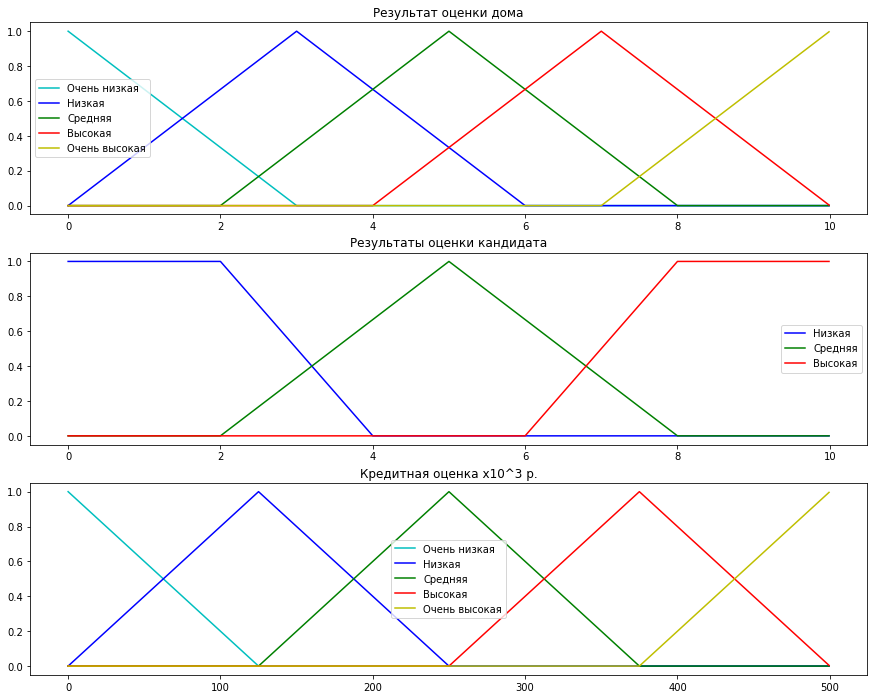

In [ ]:
plt.rcParams["figure.figsize"] = 15, 12
# оценка дома
plt.subplot(3,1,1), plt.plot(x_house, house_very_low, 'c', linewidth=1.5, label='Очень низкая')
plt.subplot(3,1,1), plt.plot(x_house, house_low, 'b', linewidth=1.5, label='Низкая')
plt.subplot(3,1,1), plt.plot(x_house, house_medium, 'g', linewidth=1.5, label='Средняя')
plt.subplot(3,1,1), plt.plot(x_house, house_high, 'r', linewidth=1.5, label='Высокая')
plt.subplot(3,1,1), plt.plot(x_house, house_very_high, 'y', linewidth=1.5, label='Очень высокая'),plt.title("Результат оценки дома")
plt.legend()

# оценка кандидата
plt.subplot(3,1,2), plt.plot(x_applicant, applicant_low, 'b', linewidth=1.5, label='Низкая')
plt.subplot(3,1,2), plt.plot(x_applicant, applicant_medium, 'g', linewidth=1.5, label='Средняя')
plt.subplot(3,1,2), plt.plot(x_applicant, applicant_high, 'r', linewidth=1.5, label='Высокая'),plt.title("Результаты оценки кандидата")
plt.legend()

# кредитная оценка
plt.subplot(3,1,3), plt.plot(x_credit, credit_very_low, 'c', linewidth=1.5, label='Очень низкая')
plt.subplot(3,1,3), plt.plot(x_credit, credit_low, 'b', linewidth=1.5, label='Низкая')
plt.subplot(3,1,3), plt.plot(x_credit, credit_medium, 'g', linewidth=1.5, label='Средняя')
plt.subplot(3,1,3), plt.plot(x_credit, credit_high, 'r', linewidth=1.5, label='Высокая')
plt.subplot(3,1,3), plt.plot(x_credit, credit_very_high, 'y', linewidth=1.5, label='Очень высокая'),plt.title("Кредитная оценка x10^3 р.")
plt.legend()

plt.show()

## Вспомогательные функции И и ИЛИ
- Для «и» мы использовали минимальную функцию для применения правил
- Для «или» мы использовали максимальную функцию для применения правил

In [ ]:
def and_rule(x, y, z):
    rule = np.fmin(x, y)
    act = np.fmin(rule, z)
    return act

def or_rule(x, y, z):
    rule = np.fmax(x, y)
    act = np.fmax(rule, z)
    return act

## База правил оценки дома
1. Рыночная стоимость низкая значит дом дешевый
    > Market_value == Low AND House == Low ==> C1

2. Район плохой значит дом дешевый
    > Location == Bad AND House == Low ==> C2

3. Район плохой и рыночная стоимость низкая значит дом очень дешевый
    > ( Location == Bad AND Market_value == Low ) AND House == Very_Low ==> C3

4. Районой плохой и рыночная стоимость средняя значит дом дешевый
    > ( Location == Bad AND Market_value == Medium ) AND House == Low ==> C4

5. Район плохой и рыночная стоимость высокая значит дом средний
    > ( Location == Bad AND Market_value == High ) AND House == Medium ==> C5

6. Район плохой и (Рыночная стоимость высокая значем дом дорогой
    > ( Location == Bad AND Market_value == Very_high ) AND House == High ==> C6

7. Район средний и рыночная стоимость низкая значит дом дешевый
    > ( Location == Fair AND Market_value == Low ) AND House == Low ==> C7

8. Район средний и рыночная стоимость средняя значит у дома средняя стоимость
    > ( Location == Fair AND Market_value == Medium ) AND House == Medium ==> C8

9. Район средний и рвыночная стоимость высокая значит стоимость дома высокая  
    > ( Location == Fair AND Market_value == High ) AND House == High ==> C9

10. Район средняя рыночная стоимость очень высокая значит стоимости дома оцень высокая
    > ( Location == Fair AND Market_value == Very_high ) AND House == Very_high ==> C10

11. Великолепный район и рыночная стоимость низкая значит цена дома средняя
    > ( Location == Excellent AND Market_value == Low ) AND House == Medium ==> C11

12. Великолепный район и рыночная стоимость средняя значит стоимость дома высокая
    > ( Location == Excellent AND Market_value == Medium ) AND House == High ==> C12

13. Великолепный район и рыночная стоимость высокая тогда стоимость дома очень высокая
    > ( Location == Excellent AND Market_value == high ) AND House == Very_high ==> C13

14. Великолепный район и рыночная стоимость очень высокая значит дом очень дорогой
    > ( Location == Excellent AND Market_value == Very_high ) AND House == Very_high ==> C14
    
### Комбинации правил:
    Rule = C1 or C2 or C3 or C4 or C5 or C6 or C7 or C8 or C9 or C10 or C11 or C12 or C13 or C14

In [ ]:
def apply_house_rules(market_value, location, is_show=0):
    # рыночная стоимость
    market_level_low = fuzz.interp_membership(x_house_market, market_low, market_value)
    market_level_medium = fuzz.interp_membership(x_house_market, market_medium, market_value)
    market_level_high = fuzz.interp_membership(x_house_market, market_high, market_value)
    market_level_very_high = fuzz.interp_membership(x_house_market, market_very_high, market_value)

    # Район
    location_level_bad = fuzz.interp_membership(x_house_location, location_bad, location)
    location_level_fair = fuzz.interp_membership(x_house_location, location_fair, location)
    location_level_excellent = fuzz.interp_membership(x_house_location, location_excellent, location)

    ### Набор правил
    # 1. Market_value == Low =>>> House == Low
    house_act_low1 = np.fmin(market_level_low, house_low)

    # 2. Location == Bad =>>> House == Low
    house_act_low2 = np.fmin(location_level_bad, house_low)

    # 3. Location == Bad and Market_value == Low =>>> House == Very_low
    house_act_very_low = and_rule(location_level_bad, market_level_low, house_very_low)

    # 4. Location == Bad and Market_value == Medium =>>> House == Low
    house_act_low3 = and_rule(location_level_bad, market_level_medium, house_low)

    # 5. Location == Bad and Market_value == High =>>> House == Medium
    house_act_medium1 = and_rule(location_level_bad, market_level_high, house_medium)

    # 6. Location == Bad and Market_value == Very_high =>>> House == High
    house_act_high1 = and_rule(location_level_bad, market_level_very_high, house_high)

    # 7. Location == Fair and Market_value == Low =>>> House == Low
    house_act_low4 = and_rule(location_level_fair, market_level_low, house_low)

    # 8. Location == Fair and Market_value == Medium =>>> House == Medium
    house_act_medium2 = and_rule(location_level_fair, market_level_medium, house_medium)

    # 9. Location == Fair and Market_value == High =>>> House == High
    house_act_high2 = and_rule(location_level_fair, market_level_high, house_high)

    # 10. Location == Fair and Market_value == Very_high =>>> House == Very_high
    house_act_very_high1 = and_rule(location_level_fair, market_level_very_high, house_very_high)

    # 11. Location == Excellent and Market_value == Low =>>> House == Medium
    house_act_medium3 = and_rule(location_level_excellent, market_level_low, house_medium)

    # 12. Location == Excellent and Market_value == Medium =>>> House == High
    house_act_high3 = and_rule(location_level_excellent, market_level_medium, house_high)

    # 13. Location == Excellent and Market_value == High =>>> House == Very_high
    house_act_very_high2 = and_rule(location_level_excellent, market_level_high, house_very_high)

    # 14. Location == Excellent and Market_value == Very_high =>>> House == Very_high
    house_act_very_high3 = and_rule(location_level_excellent, market_level_very_high, house_very_high)

    # Комбинируем правила
    step = or_rule(house_act_low1, house_act_low2, house_act_low3)
    house_act_low = np.fmax(step, house_act_low4)

    house_act_medium = or_rule(house_act_medium1, house_act_medium2, house_act_medium3)

    house_act_high = or_rule(house_act_high1, house_act_high2, house_act_high3)

    house_act_very_high = or_rule(house_act_very_high1, house_act_very_high2, house_act_very_high3)

    step = or_rule(house_act_very_low, house_act_low, house_act_medium)
    house = or_rule(step, house_act_high, house_act_very_high)

    # Выведем график
    if is_show == 1:
        plt.rcParams["figure.figsize"] = 15, 4
        plt.plot(x_house, house_very_low, 'c', linestyle='--', linewidth=1.5, label='Очень низкая')
        plt.plot(x_house, house_low, 'b', linestyle='--', linewidth=1.5, label='Низкая')
        plt.plot(x_house, house_medium, 'g', linestyle='--', linewidth=1.5, label='Среднаяя')
        plt.plot(x_house, house_high, 'r', linestyle='--', linewidth=1.5, label='Высокая')
        plt.plot(x_house, house_very_high, 'y', linestyle='--', linewidth=1.5, label='Очень высокая'),plt.title("Результат оценки дома")
        plt.legend()

        plt.fill_between(x_house, house, color='r')
        plt.ylim(-0.1, 1.1)
        plt.grid(True)
        plt.show()

    return house

## Посмотрим на результат написанной функции



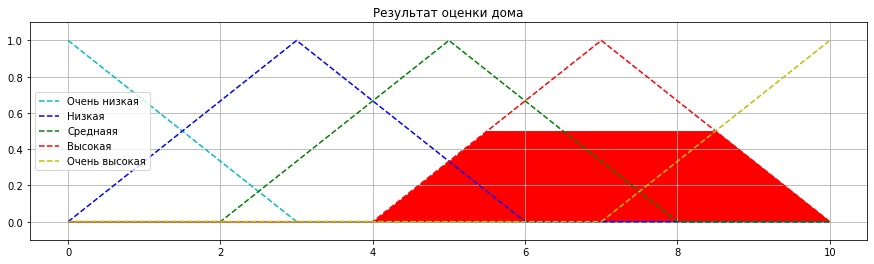

In [ ]:
h_eval = apply_house_rules(250, 4, is_show=1)

## Правила для оценки кандадата


In [ ]:
def apply_applicant_rules(assets, income, is_show=0):
    # личные активы
    p_asset_level_low = fuzz.interp_membership(x_person_asset, p_asset_low, assets)
    p_asset_level_medium = fuzz.interp_membership(x_person_asset, p_asset_medium, assets)
    p_asset_level_high = fuzz.interp_membership(x_person_asset, p_asset_high, assets)

    # доход кандидата
    p_income_level_low = fuzz.interp_membership(x_person_income, p_income_low, income)
    p_income_level_medium = fuzz.interp_membership(x_person_income, p_income_medium, income)
    p_income_level_high = fuzz.interp_membership(x_person_income, p_income_high, income)
    p_income_level_very_high = fuzz.interp_membership(x_person_income, p_income_very_high, income)


    # 1. Asset == Low and Income == Low =>>> Applicant ==  Low
    applicant_act_low1 = and_rule(p_asset_level_low, p_income_level_low, applicant_low)
    # 2. Asset == Low and Income == Medium =>>> Applicant ==  Low
    applicant_act_low2 = and_rule(p_asset_level_low, p_income_level_medium, applicant_low)
    # 3. Asset == Low and Income == High =>>> Applicant ==  Medium
    applicant_act_medium1 = and_rule(p_asset_level_low, p_income_level_high, applicant_medium)
    # 4. Asset == Low and Income == Very_high =>>> Applicant ==  High
    applicant_act_high1 = and_rule(p_asset_level_low, p_income_level_very_high, applicant_high)
    # 5. Asset == Medium and Income == Low =>>> Applicant ==  Low
    applicant_act_low3 = and_rule(p_asset_level_medium, p_income_level_low, applicant_low)
    # 6. Asset == Medium and Income == Medium =>>> Applicant ==  Medium
    applicant_act_medium2 = and_rule(p_asset_level_medium, p_income_level_medium, applicant_medium)
    # 7. Asset == Medium and Income == High =>>> Applicant ==  High
    applicant_act_high2 = and_rule(p_asset_level_medium, p_income_level_high, applicant_high)
    # 8. Asset == Medium and Income == Very_high =>>> Applicant ==  High
    applicant_act_high3 = and_rule(p_asset_level_medium, p_income_level_very_high, applicant_high)
    # 9. Asset == High and Income == Low =>>> Applicant ==  Medium
    applicant_act_medium3 = and_rule(p_asset_level_high, p_income_low, applicant_medium)
    # 10. Asset == High and Income == Medium =>>> Applicant ==  Medium
    applicant_act_medium4 = and_rule(p_asset_level_high, p_income_level_medium, applicant_medium)
    # 11. Asset == High and Income == High =>>> Applicant ==  High
    applicant_act_high4 = and_rule(p_asset_level_high, p_income_level_high, applicant_high)
    # 12. Asset == High and Income == Very_high =>>> Applicant ==  High
    applicant_act_high5 = and_rule(p_asset_level_high, p_income_level_very_high, applicant_medium)

    # Комбинируем правила
    applicant_act_low = or_rule(applicant_act_low1, applicant_act_low2, applicant_act_low3)

    step = or_rule(applicant_act_medium1, applicant_act_medium2, applicant_act_medium3)
    applicant_act_medium = np.fmax(step, applicant_act_medium4)

    step = or_rule(applicant_act_high1, applicant_act_high2, applicant_act_high3)
    applicant_act_high = or_rule(step, applicant_act_high4, applicant_act_high5)

    applicant = or_rule(applicant_act_low, applicant_act_medium, applicant_act_high)

    # Выведем график
    if is_show == 1:
        plt.rcParams["figure.figsize"] = 15, 4
        plt.plot(x_applicant, applicant_low, 'b', linestyle='--', linewidth=1.5, label='Низкий')
        plt.plot(x_applicant, applicant_medium, 'g', linestyle='--', linewidth=1.5, label='Средний')
        plt.plot(x_applicant, applicant_high, 'r', linestyle='--', linewidth=1.5, label='Высокий'),plt.title("Результат оценки кандидата")
        plt.legend()

        plt.fill_between(x_applicant, applicant, color='r')
        plt.ylim(-0.1, 1.1)
        plt.grid(True)
        plt.show()

    return applicant

## Посмотрим на результат написанной функции

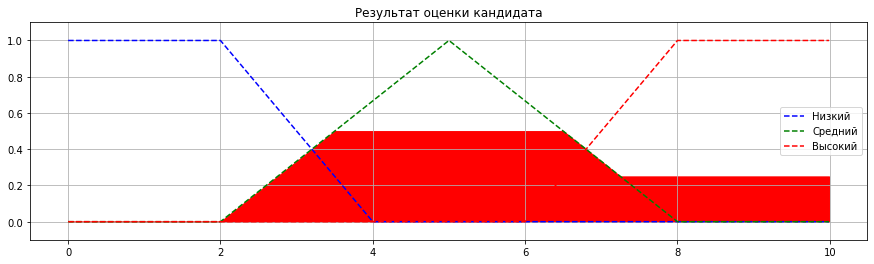

In [ ]:
a_eval = apply_applicant_rules(550, 45, is_show=1)

## Правила для кредитной оценки


In [ ]:
def apply_credit_rules(house, income, interest, applicant, is_show=0):
    # house
    house_level_very_low = np.fmin(house, house_low)
    house_level_low = np.fmin(house, house_low)
    house_level_medium = np.fmin(house, house_medium)
    house_level_high = np.fmin(house, house_high)
    house_level_very_high = np.fmin(house, house_very_high)

    # доходы
    p_income_level_low = fuzz.interp_membership(x_person_income, p_income_low, income)
    p_income_level_medium = fuzz.interp_membership(x_person_income, p_income_medium, income)
    p_income_level_high = fuzz.interp_membership(x_person_income, p_income_high, income)
    p_income_level_very_high = fuzz.interp_membership(x_person_income, p_income_very_high, income)

    # ставка
    b_interest_level_low = fuzz.interp_membership(x_interest, b_interest_low, interest)
    b_interest_level_medium = fuzz.interp_membership(x_interest, b_interest_medium, interest)
    b_interest_level_high = fuzz.interp_membership(x_interest, b_interest_high, interest)

    # уровень кандидата
    applicant_level_low = np.fmin(applicant, applicant_low)
    applicant_level_medium = np.fmin(applicant, applicant_medium)
    applicant_level_high = np.fmin(applicant, applicant_high)

    # 1. Income == Low and Interest == Medium =>>> Credit == Very_low
    credit_act_very_low1 = and_rule(p_income_level_low, b_interest_level_medium, credit_very_low)
    # 2. Income == Low and Interest == High =>>> Credit == Very_low
    credit_act_very_low2 = and_rule(p_income_level_low, b_interest_level_high, credit_very_low)
    # 3. Income == Medium and Interest == High =>>> Credit == Low
    credit_act_low1 = and_rule(p_income_level_medium, b_interest_level_high, credit_low)
    # 4. Applicant == Low =>>> Credit == Very_low
    credit_act_very_low3 = np.fmin(applicant_level_low, credit_very_low)
    # 5. House == Very_low =>>> Credit == Very_low
    credit_act_very_low4 = np.fmin(house_level_very_low, credit_very_low)
    # 6. Applicant == Medium and House == Very_low =>>> Credit == Low
    credit_act_low2 = and_rule(applicant_level_medium, house_level_very_low, credit_low)
    # 7. Applicant == Medium and House == Low =>>> Credit == Low
    credit_act_low3 = and_rule(applicant_level_medium, house_level_low, credit_low)
    # 8. Applicant == Medium and House == Medium =>>> Credit == Medium
    credit_act_medium1 = and_rule(applicant_level_medium, house_level_medium, credit_medium)
    # 9. Applicant == Medium and House == High =>>> Credit == High
    credit_act_high1 = and_rule(applicant_level_medium, house_level_high, credit_high)
    # 10. Applicant == Medium and House == Very_high =>>> Credit == High
    credit_act_high2 = and_rule(applicant_level_medium, house_level_very_high, credit_high)
    # 11. Applicant == High and House == Very_low =>>> Credit == Low
    credit_act_low4 = and_rule(applicant_level_high, house_level_very_low, credit_low)
    # 12. Applicant == High and House == Low =>>> Credit == Medium
    credit_act_medium2 = and_rule(applicant_level_high, house_level_low, credit_medium)
    # 13. Applicant == High and House == Medium =>>> Credit == High
    credit_act_high3 = and_rule(applicant_level_high, house_level_medium, credit_high)
    # 14. Applicant == High and House == High =>>> Credit == High
    credit_act_high4 = and_rule(applicant_level_high, house_level_high, credit_high)
    # 15. Applicant == High and House == Very_high =>>> Credit == Very_high
    credit_act_very_high = and_rule(applicant_level_high, house_level_very_high, credit_very_high)


    step = or_rule(credit_act_very_low1, credit_act_very_low2, credit_act_very_low3)
    credit_act_very_low = np.fmax(step, credit_act_very_low4)

    step = or_rule(credit_act_low1, credit_act_low2, credit_act_low3)
    credit_act_low = np.fmax(step, credit_act_low4)

    credit_act_medium = np.fmax(credit_act_medium1, credit_act_medium2)

    step = or_rule(credit_act_high1, credit_act_high2, credit_act_high3)
    credit_act_high = np.fmax(step, credit_act_high4)


    step = or_rule(credit_act_very_low, credit_act_low, credit_act_medium)
    credit = or_rule(step, credit_act_high, credit_act_very_high)

    # Выведем график
    if is_show == 1:
        plt.rcParams["figure.figsize"] = 15, 4
        plt.plot(x_credit, credit_very_low, 'c', linestyle='--', linewidth=1.5, label='Оцень низкая')
        plt.plot(x_credit, credit_low, 'b', linestyle='--', linewidth=1.5, label='Низкая')
        plt.plot(x_credit, credit_medium, 'g', linestyle='--', linewidth=1.5, label='Средняя')
        plt.plot(x_credit, credit_high, 'r', linestyle='--', linewidth=1.5, label='Высокая')
        plt.plot(x_credit, credit_very_high, 'y', linestyle='--', linewidth=1.5, label='Очень высокая'),plt.title("Кредитная оценка x10^3 р.")
        plt.legend()

        plt.fill_between(x_credit, credit_eval)
        plt.ylim(-0.1, 1.1)
        plt.grid(True)
        plt.show()
        return credit

## Посмотрим результат

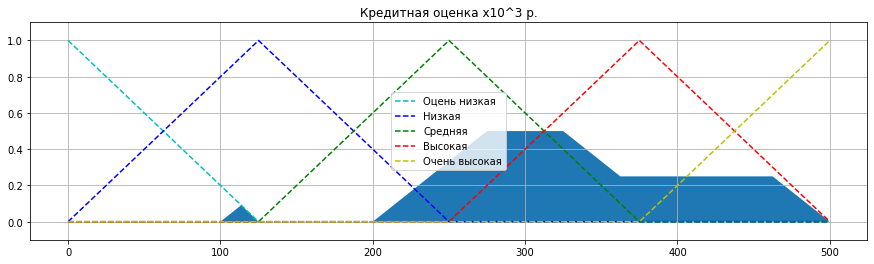

In [ ]:
credit_eval = apply_credit_rules(h_eval, 45, 4, a_eval, is_show=1)

## Последовательный вызов управляющих функций

In [ ]:
def apply_all_rules(market_value, location, assets, income, interest, is_show=0):
    house = apply_house_rules(market_value, location, is_show)
    applicant = apply_applicant_rules(assets,income, is_show)
    credit = apply_credit_rules(house, income, interest, applicant, is_show)
    return credit

## Пример вывода после применения всех наборов правил

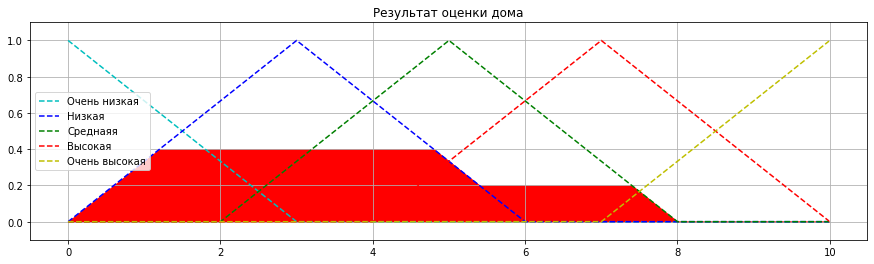

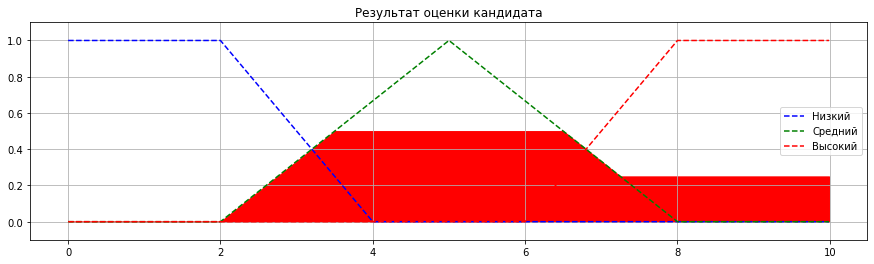

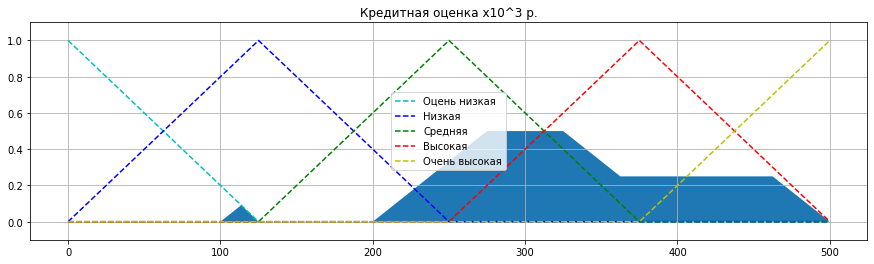

In [ ]:
credit = apply_all_rules(150, 3, 550, 45, 4, is_show=1)


## Принятие решения
- После применения всех правил мы дефазифицируем вывод правил со средним максимальным значением и генерируем единственное значение как решение системы.

In [ ]:
def make_decision(market_value, location, assets, income, interest, is_show=0):
    credit = apply_all_rules(market_value, location, assets, income, interest, is_show)
    # mom - mean of maximum
    defuzz_credit = fuzz.defuzz(x_credit, credit, 'mom')
    max_n = np.max(credit)
    print("\n\n")
    if (is_show == 1):
        plt.rcParams["figure.figsize"] = 15, 4
        plt.plot(x_credit, credit_very_low, 'c', linestyle='--', linewidth=1.5, label='Очень низкая')
        plt.plot(x_credit, credit_low, 'b', linestyle='--', linewidth=1.5, label='Низкая')
        plt.plot(x_credit, credit_medium, 'g', linestyle='--', linewidth=1.5, label='Средняя')
        plt.plot(x_credit, credit_high, 'r', linestyle='--', linewidth=1.5, label='Высокая')
        plt.plot(x_credit, credit_very_high, 'y', linestyle='--', linewidth=1.5, label='Очень высокая'),plt.title("Кредитная оценка x10^3 р.")
        plt.legend()

        plt.fill_between(x_credit, credit, color='b')
        plt.ylim(-0.1, 1.1)
        plt.grid(True)

        plt.plot(defuzz_credit, max_n, 'X', color='r')
        plt.show()

    print("\nВывод: ", defuzz_credit, "x10^3 р.")
    return defuzz_credit

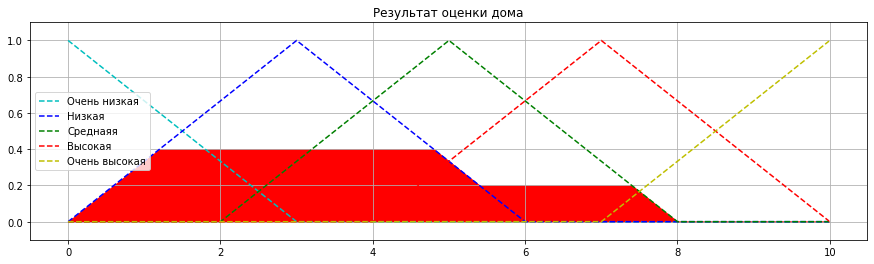

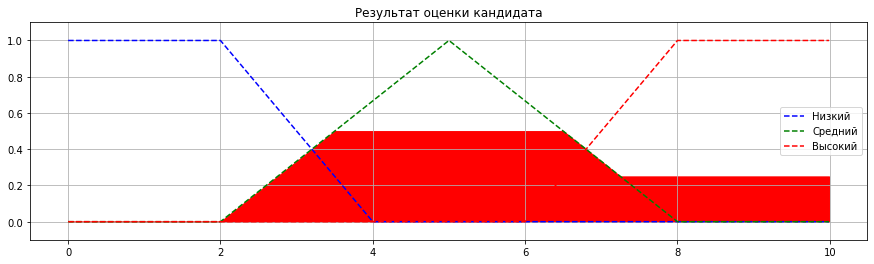

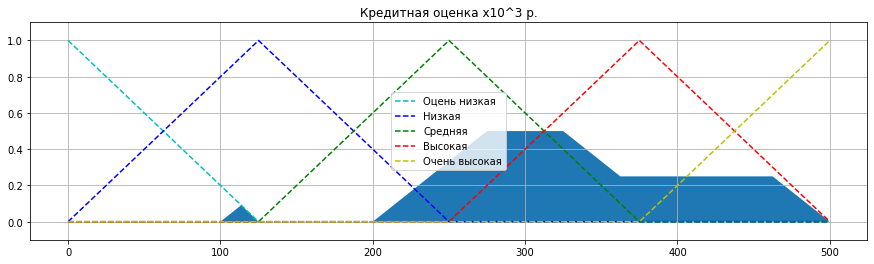

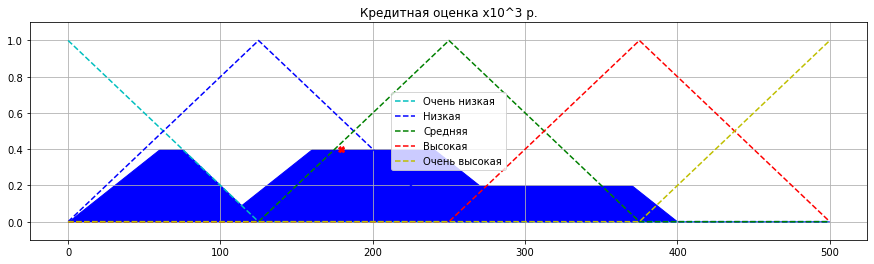


Вывод:  179.22774869109946 x10^3 р.


In [ ]:
credit_decision = make_decision(150, 3, 550, 45, 4, is_show=1)

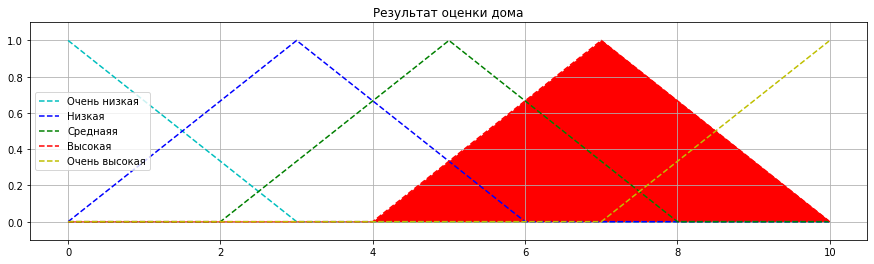

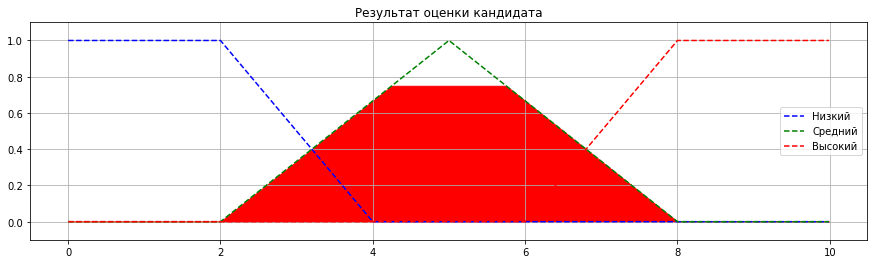

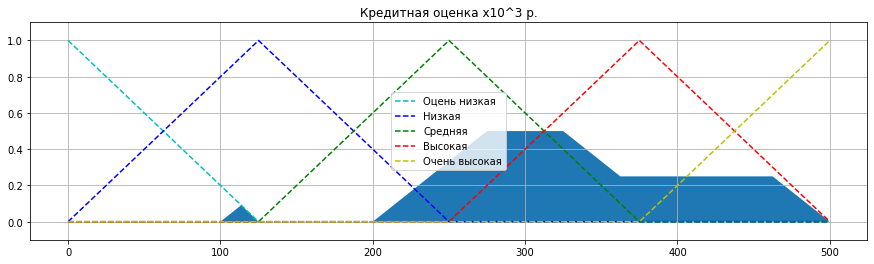

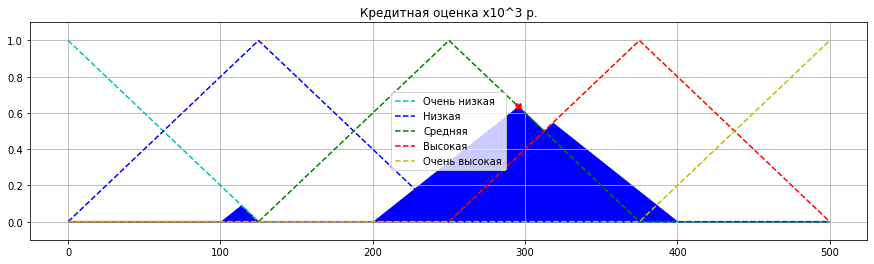


Вывод:  295.5 x10^3 р.


In [ ]:
credit_decision = make_decision(600, 6, 500, 40, 5, is_show=1)